In [ ]:
# ============================================================================
# DISPLAY ALL RAW DATA - EVERY ROW AND COLUMN
# ============================================================================

import pandas as pd

# Remove ALL display limits
pd.set_option('display.max_columns', None)      # Show all columns
pd.set_option('display.max_rows', None)         # Show all rows
pd.set_option('display.width', None)            # No width limit
pd.set_option('display.max_colwidth', None)     # Show full column content

# Load the dataset
url = "https://raw.githubusercontent.com/eyowhite/Messy-dataset/main/healthcare_messy_data.csv"
df = pd.read_csv(url)

# Display complete dataset information
print("="*100)
print("COMPLETE RAW HEALTHCARE DATASET")
print("="*100)
print(f"\nDataset Size: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n")

# This will show EVERY single row and column
print(df.to_string())

COMPLETE RAW HEALTHCARE DATASET

Dataset Size: 1000 rows × 10 columns


         Patient Name    Age  Gender      Condition    Medication     Visit Date Blood Pressure  Cholesterol                Email  Phone Number
0          david lee      25   Other  Heart Disease     METFORMIN     01/15/2020         140/90        200.0    name@hospital.org  555-555-5555
1        emily davis     NaN    Male       Diabetes          NONE  April 5, 2018         120/80        200.0                  NaN           NaN
2     laura martinez      35   Other         Asthma     METFORMIN     2019.12.01         110/70        160.0   contact@domain.com           NaN
3     michael wilson     NaN    Male       Diabetes     ALBUTEROL     01/15/2020         110/70          NaN    name@hospital.org  555-555-5555
4          david lee     NaN  Female         Asthma          NONE     2020/02/20         110/70        180.0                  NaN              
5         mary clark     NaN    Male   Hypertension     METFORMI

Libraries imported successfully!

ORIGINAL DATASET
Dataset shape: (1000, 10)

First few rows:
       Patient Name  Age  Gender      Condition Medication     Visit Date  \
0        david lee    25   Other  Heart Disease  METFORMIN     01/15/2020   
1      emily davis   NaN    Male       Diabetes       NONE  April 5, 2018   
2   laura martinez    35   Other         Asthma  METFORMIN     2019.12.01   
3   michael wilson   NaN    Male       Diabetes  ALBUTEROL     01/15/2020   
4        david lee   NaN  Female         Asthma       NONE     2020/02/20   

  Blood Pressure  Cholesterol               Email  Phone Number  
0         140/90        200.0   name@hospital.org  555-555-5555  
1         120/80        200.0                 NaN           NaN  
2         110/70        160.0  contact@domain.com           NaN  
3         110/70          NaN   name@hospital.org  555-555-5555  
4         110/70        180.0                 NaN                

Dataset info:
<class 'pandas.core.frame.DataFr

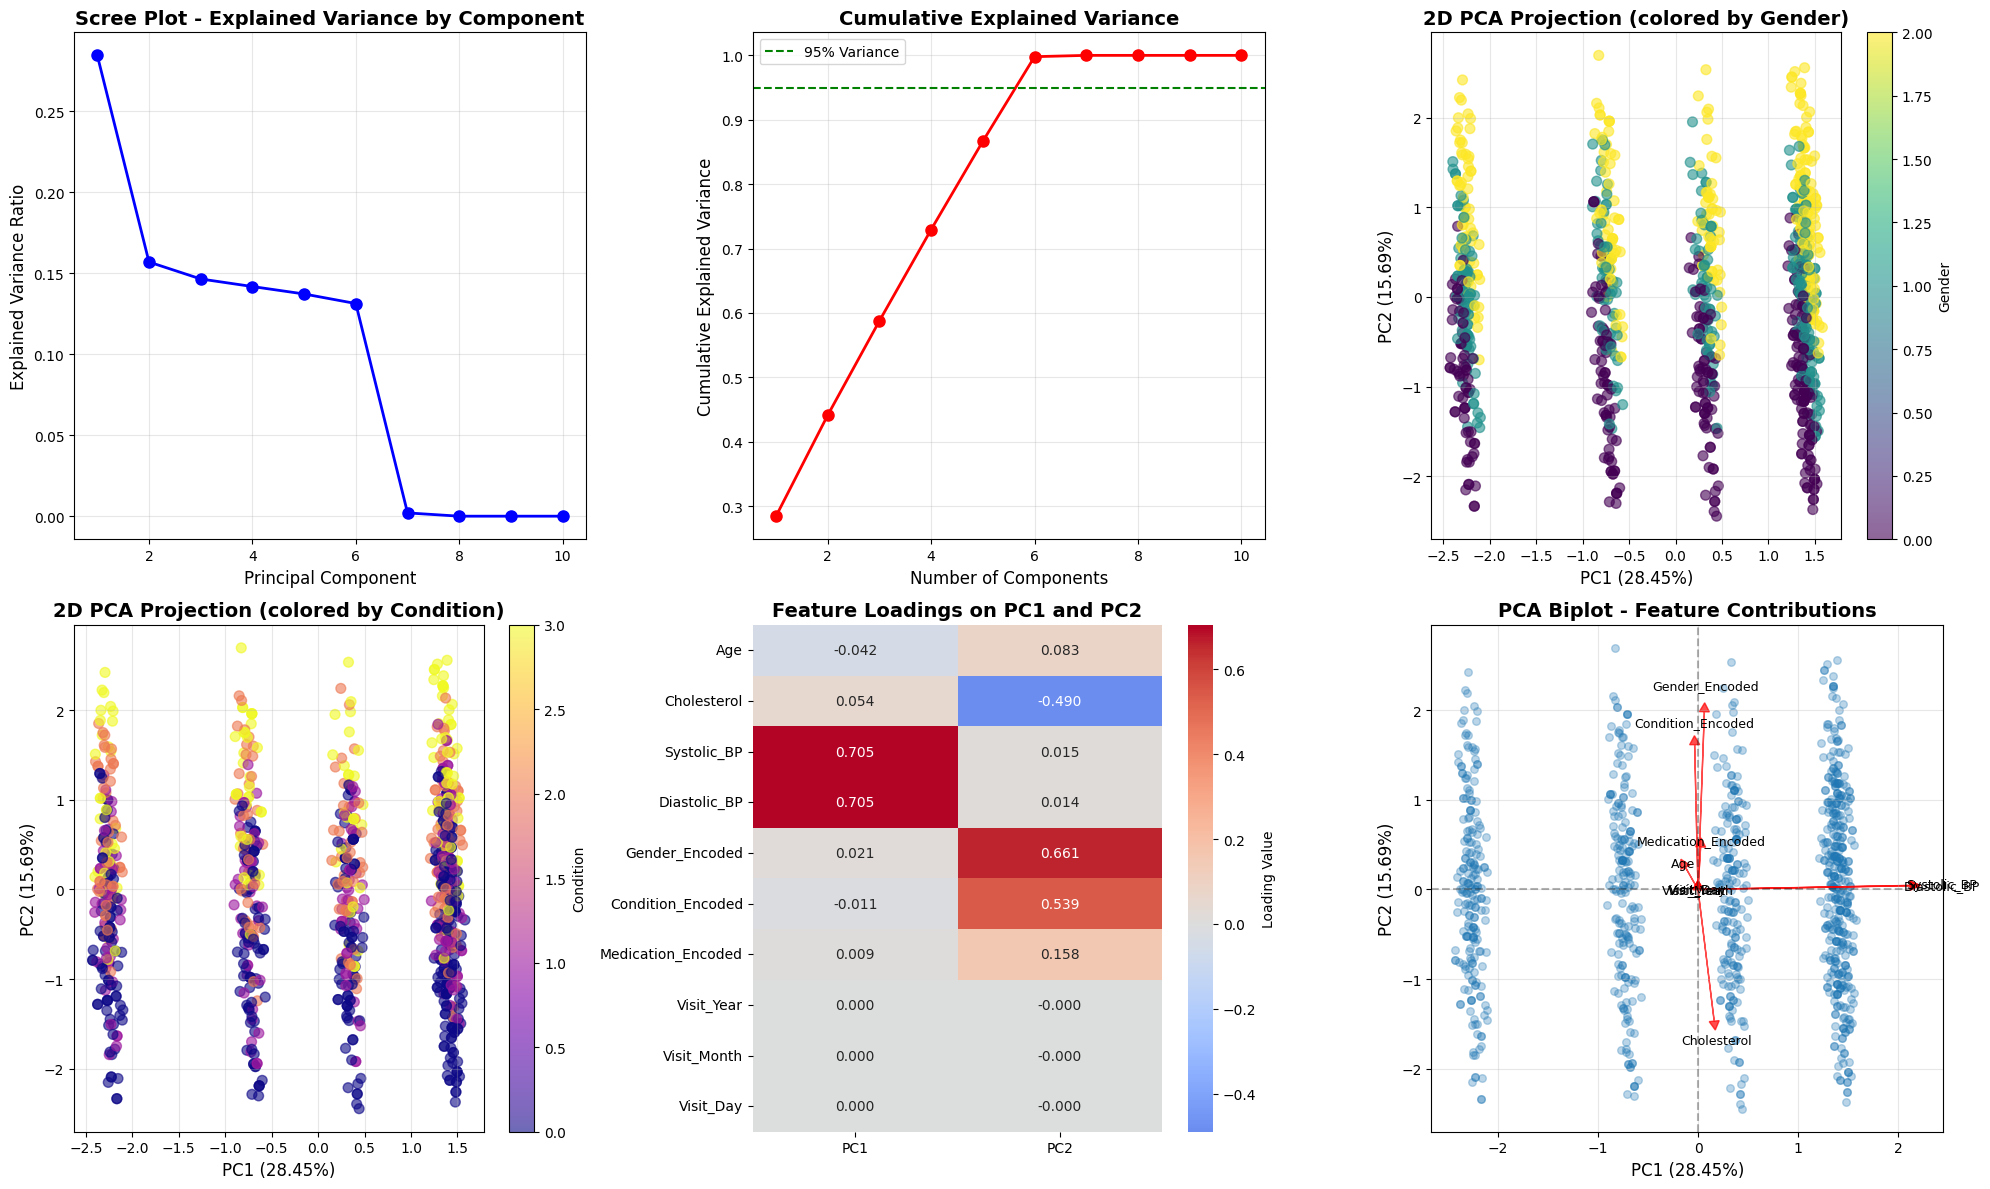


Creating 3D PCA Visualization...
3D PCA visualizations saved as 'pca_analysis_3d.png'


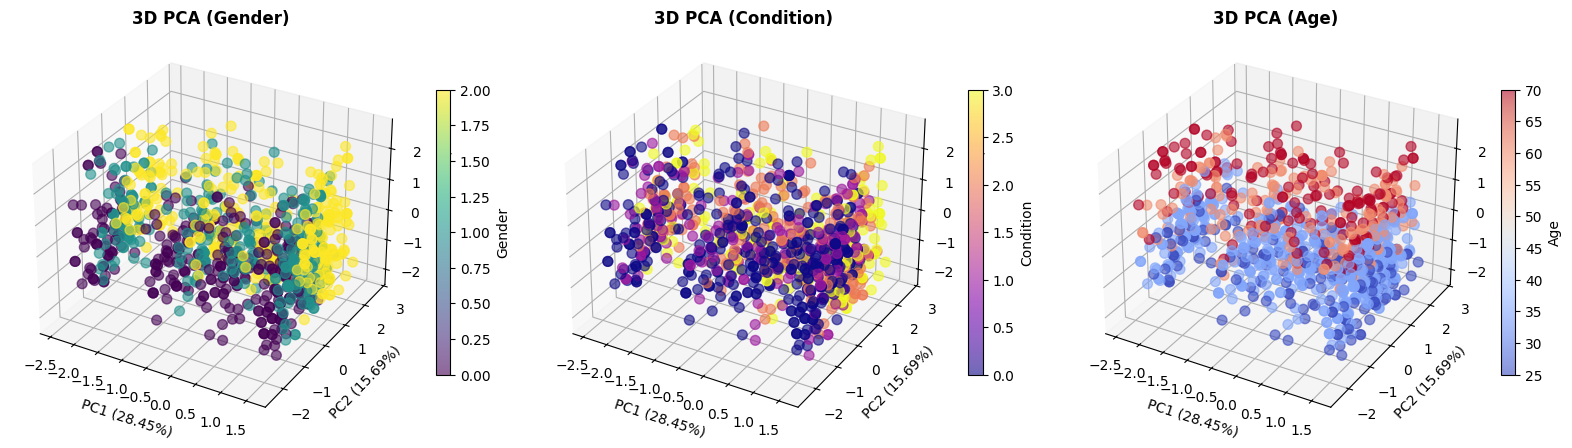


FINAL SUMMARY REPORT

1. DATA CLEANING:
   - Original dataset shape: (1000, 10)
   - Cleaned dataset shape: (1000, 15)
   - Missing values handled: Yes
   - Text columns cleaned: Yes

2. FEATURE ENGINEERING:
   - Blood Pressure split into Systolic/Diastolic: Yes
   - Date features extracted: Yes
   - Categorical variables encoded: 3

3. NORMALIZATION:
   - Method: StandardScaler (z-score normalization)
   - Features normalized: 10

4. PCA RESULTS:
   - Total features: 10
   - Principal components computed: 10
   - Variance explained by PC1: 0.2845 (28.45%)
   - Variance explained by PC2: 0.1569 (15.69%)
   - Total variance (PC1+PC2): 0.4414 (44.14%)
   - Components for 95% variance: 6

5. VISUALIZATIONS CREATED:
   - Scree plot
   - Cumulative variance plot
   - 2D PCA scatter plots (multiple views)
   - 3D PCA scatter plots (multiple views)
   - Feature loading heatmap
   - PCA biplot

ANALYSIS COMPLETE!

Saving processed data...
Cleaned data saved to 'healthcare_cleaned.csv'
2D PCA 

In [ ]:

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

# Step 2: Load the Dataset
# You can load from local file or URL
url = "https://raw.githubusercontent.com/eyowhite/Messy-dataset/main/healthcare_messy_data.csv"
df = pd.read_csv(url)

print("\n" + "="*50)
print("ORIGINAL DATASET")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nDataset info:")
print(df.info())
print(f"\nMissing values:")
print(df.isnull().sum())

# Step 3: Data Cleaning - Remove Leading/Trailing Spaces
print("\n" + "="*50)
print("STEP 1: CLEANING TEXT COLUMNS")
print("="*50)

# Strip whitespace from all string columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()
    print(f"Cleaned column: {col}")

# Step 4: Handle Missing Values
print("\n" + "="*50)
print("STEP 2: HANDLING MISSING VALUES")
print("="*50)

# Create a copy for cleaning
df_cleaned = df.copy()

# Check missing values before handling
print("Missing values before handling:")
print(df_cleaned.isnull().sum())

# Convert 'Age' column to numeric, coercing errors, so non-numeric values become NaN
# This ensures 'Age' is treated numerically during imputation and PCA.
if 'Age' in df_cleaned.columns:
    initial_age_dtype = df_cleaned['Age'].dtype
    df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
    if df_cleaned['Age'].dtype != initial_age_dtype:
        print(f"Converted 'Age' column to numeric type (errors coerced to NaN).")

# Strategy for handling missing values:
# Numerical columns: impute with median
# Categorical columns: impute with mode

numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Remove non-feature columns like ID, Email, Phone Number from imputation
cols_to_drop = ['Patient ID', 'Email', 'Phone Number', 'Visit Date']
numerical_cols = [col for col in numerical_cols if col not in cols_to_drop]
categorical_cols = [col for col in categorical_cols if col not in cols_to_drop]

# Impute numerical columns with median
for col in numerical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        median_value = df_cleaned[col].median()
        df_cleaned[col].fillna(median_value, inplace=True)
        print(f"Imputed {col} with median: {median_value}")

# Impute categorical columns with mode
for col in categorical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace=True)
        print(f"Imputed {col} with mode: {mode_value}")

print("\nMissing values after handling:")
print(df_cleaned.isnull().sum())

# Step 5: Data Type Corrections
print("\n" + "="*50)
print("STEP 3: DATA TYPE CORRECTIONS")
print("="*50)

# Convert Visit Date to datetime
if 'Visit Date' in df_cleaned.columns:
    df_cleaned['Visit Date'] = pd.to_datetime(df_cleaned['Visit Date'], errors='coerce')
    print("Converted 'Visit Date' to datetime format")

# Extract year, month, day from Visit Date if needed
if 'Visit Date' in df_cleaned.columns:
    df_cleaned['Visit_Year'] = df_cleaned['Visit Date'].dt.year
    df_cleaned['Visit_Month'] = df_cleaned['Visit Date'].dt.month
    df_cleaned['Visit_Day'] = df_cleaned['Visit Date'].dt.day
    print("Extracted year, month, day from Visit Date")

# Step 6: Handle Blood Pressure (if it's in format like "120/80")
print("\n" + "="*50)
print("STEP 4: HANDLING BLOOD PRESSURE")
print("="*50)

if 'Blood Pressure' in df_cleaned.columns:
    # Split Blood Pressure into Systolic and Diastolic
    if df_cleaned['Blood Pressure'].dtype == 'object':
        bp_split = df_cleaned['Blood Pressure'].str.split('/', expand=True)
        df_cleaned['Systolic_BP'] = pd.to_numeric(bp_split[0], errors='coerce')
        df_cleaned['Diastolic_BP'] = pd.to_numeric(bp_split[1], errors='coerce')
        print("Split Blood Pressure into Systolic and Diastolic")

        # Impute any missing BP values
        df_cleaned['Systolic_BP'].fillna(df_cleaned['Systolic_BP'].median(), inplace=True)
        df_cleaned['Diastolic_BP'].fillna(df_cleaned['Diastolic_BP'].median(), inplace=True)

# Step 7: Encode Categorical Variables
print("\n" + "="*50)
print("STEP 5: ENCODING CATEGORICAL VARIABLES")
print("="*50)

# Create a copy for encoding
df_encoded = df_cleaned.copy()

# Label encode categorical variables
label_encoders = {}
categorical_features = ['Gender', 'Condition', 'Medication']

for col in categorical_features:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col + '_Encoded'] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Step 8: Select Features for PCA
print("\n" + "="*50)
print("STEP 6: SELECTING FEATURES FOR PCA")
print("="*50)

# Select only numerical features for PCA
features_for_pca = ['Age', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
                    'Gender_Encoded', 'Condition_Encoded', 'Medication_Encoded']

# Add Visit Date features if available
if 'Visit_Year' in df_encoded.columns:
    features_for_pca.extend(['Visit_Year', 'Visit_Month', 'Visit_Day'])

# Filter features that exist in the dataset
features_for_pca = [f for f in features_for_pca if f in df_encoded.columns]

print(f"Features selected for PCA: {features_for_pca}")

# Create feature matrix
X = df_encoded[features_for_pca].copy()

# Handle any remaining missing values
X = X.fillna(X.median())

print(f"\nFeature matrix shape: {X.shape}")
print(f"Feature matrix info:")
print(X.describe())

# Step 9: Normalization (Standardization)
print("\n" + "="*50)
print("STEP 7: NORMALIZATION (STANDARDIZATION)")
print("="*50)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

print(f"Normalized data shape: {X_normalized.shape}")
print(f"\nNormalized data statistics:")
print(f"Mean: {X_normalized.mean(axis=0)}")
print(f"Std: {X_normalized.std(axis=0)}")

# Convert back to DataFrame for easier handling
X_normalized_df = pd.DataFrame(X_normalized, columns=features_for_pca)
print(f"\nFirst few rows of normalized data:")
print(X_normalized_df.head())

# Step 10: Apply PCA
print("\n" + "="*50)
print("STEP 8: APPLYING PCA")
print("="*50)

# Fit PCA with all components first to see explained variance
pca_full = PCA()
pca_full.fit(X_normalized)

# Display explained variance ratio for all components
print("\nExplained Variance Ratio for all components:")
for i, var in enumerate(pca_full.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

print(f"\nCumulative Explained Variance:")
cumsum = np.cumsum(pca_full.explained_variance_ratio_)
for i, var in enumerate(cumsum):
    print(f"PC1 to PC{i+1}: {var:.4f} ({var*100:.2f}%) fidelity)")

# Determine optimal number of components (e.g., 95% variance)
n_components_95 = np.argmax(cumsum >= 0.95) + 1
print(f"\nNumber of components for 95% variance: {n_components_95}")

# Step 11: PCA with 2 and 3 Components for Visualization
print("\n" + "="*50)
print("STEP 9: PCA FOR VISUALIZATION")
print("="*50)

# PCA with 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_normalized)

print(f"\n2D PCA Results:")
print(f"Explained variance ratio: {pca_2d.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca_2d.explained_variance_ratio_):.4f} ({sum(pca_2d.explained_variance_ratio_)*100:.2f}%)")

# PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_normalized)

print(f"\n3D PCA Results:")
print(f"Explained variance ratio: {pca_3d.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca_3d.explained_variance_ratio_):.4f} ({sum(pca_3d.explained_variance_ratio_)*100:.2f}%)")

# Step 12: PCA Component Analysis
print("\n" + "="*50)
print("STEP 10: PCA COMPONENT ANALYSIS")
print("="*50)

# Display component loadings (how much each feature contributes to each PC)
print("\nPCA Component Loadings (2D):")
loadings_2d = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=features_for_pca
)
print(loadings_2d)

print("\nPCA Component Loadings (3D):")
loadings_3d = pd.DataFrame(
    pca_3d.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=features_for_pca
)
print(loadings_3d)

# Step 13: Visualization - Scree Plot
print("\n" + "="*50)
print("STEP 11: CREATING VISUALIZATIONS")
print("="*50)

# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 12))

# Subplot 1: Scree Plot
plt.subplot(2, 3, 1)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         pca_full.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Scree Plot - Explained Variance by Component', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Subplot 2: Cumulative Variance Plot
plt.subplot(2, 3, 2)
plt.plot(range(1, len(cumsum) + 1), cumsum, 'ro-', linewidth=2, markersize=8)
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: 2D PCA Scatter Plot (colored by first categorical variable)
plt.subplot(2, 3, 3)
if 'Gender_Encoded' in df_encoded.columns:
    scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                         c=df_encoded['Gender_Encoded'],
                         cmap='viridis', alpha=0.6, s=50)
    plt.colorbar(scatter, label='Gender')
else:
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.6, s=50)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})', fontsize=12)
plt.title('2D PCA Projection (colored by Gender)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Subplot 4: 2D PCA Scatter Plot (colored by Condition)
plt.subplot(2, 3, 4)
if 'Condition_Encoded' in df_encoded.columns:
    scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                         c=df_encoded['Condition_Encoded'],
                         cmap='plasma', alpha=0.6, s=50)
    plt.colorbar(scatter, label='Condition')
else:
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.6, s=50)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})', fontsize=12)
plt.title('2D PCA Projection (colored by Condition)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Subplot 5: Feature Importance Heatmap for PC1 and PC2
plt.subplot(2, 3, 5)
sns.heatmap(loadings_2d, annot=True, cmap='coolwarm', center=0,
            cbar_kws={'label': 'Loading Value'}, fmt='.3f')
plt.title('Feature Loadings on PC1 and PC2', fontsize=14, fontweight='bold')
plt.tight_layout()

# Subplot 6: Biplot (PC1 vs PC2 with feature vectors)
plt.subplot(2, 3, 6)
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.3, s=30)

# Plot feature vectors
scale_factor = 3
for i, feature in enumerate(features_for_pca):
    plt.arrow(0, 0,
             pca_2d.components_[0, i] * scale_factor,
             pca_2d.components_[1, i] * scale_factor,
             head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
    plt.text(pca_2d.components_[0, i] * scale_factor * 1.15,
            pca_2d.components_[1, i] * scale_factor * 1.15,
            feature, fontsize=9, ha='center', va='center')

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})', fontsize=12)
plt.title('PCA Biplot - Feature Contributions', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis_2d.png', dpi=300, bbox_inches='tight')
print("2D PCA visualizations saved as 'pca_analysis_2d.png'")
plt.show()

# Step 14: 3D PCA Visualization
print("\nCreating 3D PCA Visualization...")

fig = plt.figure(figsize=(16, 6))

# 3D Scatter Plot 1: Colored by Gender
ax1 = fig.add_subplot(131, projection='3d')
if 'Gender_Encoded' in df_encoded.columns:
    scatter = ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                         c=df_encoded['Gender_Encoded'], cmap='viridis',
                         alpha=0.6, s=50)
    plt.colorbar(scatter, ax=ax1, label='Gender', shrink=0.5)
else:
    ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
               alpha=0.6, s=50)
ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})', fontsize=10)
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})', fontsize=10)
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})', fontsize=10)
ax1.set_title('3D PCA (Gender)', fontsize=12, fontweight='bold')

# 3D Scatter Plot 2: Colored by Condition
ax2 = fig.add_subplot(132, projection='3d')
if 'Condition_Encoded' in df_encoded.columns:
    scatter = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                         c=df_encoded['Condition_Encoded'], cmap='plasma',
                         alpha=0.6, s=50)
    plt.colorbar(scatter, ax=ax2, label='Condition', shrink=0.5)
else:
    ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
               alpha=0.6, s=50)
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})', fontsize=10)
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})', fontsize=10)
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})', fontsize=10)
ax2.set_title('3D PCA (Condition)', fontsize=12, fontweight='bold')

# 3D Scatter Plot 3: Colored by Age
ax3 = fig.add_subplot(133, projection='3d')
if 'Age' in df_encoded.columns:
    scatter = ax3.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                         c=df_encoded['Age'], cmap='coolwarm',
                         alpha=0.6, s=50)
    plt.colorbar(scatter, ax=ax3, label='Age', shrink=0.5)
else:
    ax3.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
               alpha=0.6, s=50)
ax3.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})', fontsize=10)
ax3.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})', fontsize=10)
ax3.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})', fontsize=10)
ax3.set_title('3D PCA (Age)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('pca_analysis_3d.png', dpi=300, bbox_inches='tight')
print("3D PCA visualizations saved as 'pca_analysis_3d.png'")
plt.show()

# Step 15: Summary Report
print("\n" + "="*50)
print("FINAL SUMMARY REPORT")
print("="*50)

print(f"\n1. DATA CLEANING:")
print(f"   - Original dataset shape: {df.shape}")
print(f"   - Cleaned dataset shape: {df_cleaned.shape}")
print(f"   - Missing values handled: Yes")
print(f"   - Text columns cleaned: Yes")

print(f"\n2. FEATURE ENGINEERING:")
print(f"   - Blood Pressure split into Systolic/Diastolic: Yes")
print(f"   - Date features extracted: Yes")
print(f"   - Categorical variables encoded: {len(categorical_features)}")

print(f"\n3. NORMALIZATION:")
print(f"   - Method: StandardScaler (z-score normalization)")
print(f"   - Features normalized: {len(features_for_pca)}")

print(f"\n4. PCA RESULTS:")
print(f"   - Total features: {len(features_for_pca)}")
print(f"   - Principal components computed: {len(pca_full.explained_variance_ratio_)}")
print(f"   - Variance explained by PC1: {pca_2d.explained_variance_ratio_[0]:.4f} ({pca_2d.explained_variance_ratio_[0]*100:.2f}%)")
print(f"   - Variance explained by PC2: {pca_2d.explained_variance_ratio_[1]:.4f} ({pca_2d.explained_variance_ratio_[1]*100:.2f}%)")
print(f"   - Total variance (PC1+PC2): {sum(pca_2d.explained_variance_ratio_):.4f} ({sum(pca_2d.explained_variance_ratio_)*100:.2f}%)")
print(f"   - Components for 95% variance: {n_components_95}")

print(f"\n5. VISUALIZATIONS CREATED:")
print(f"   - Scree plot")
print(f"   - Cumulative variance plot")
print(f"   - 2D PCA scatter plots (multiple views)")
print(f"   - 3D PCA scatter plots (multiple views)")
print(f"   - Feature loading heatmap")
print(f"   - PCA biplot")

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)

# Step 16: Save Processed Data
print("\nSaving processed data...")

# Save cleaned data
df_cleaned.to_csv('healthcare_cleaned.csv', index=False)
print("Cleaned data saved to 'healthcare_cleaned.csv'")

# Save PCA transformed data
pca_2d_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_2d_df.to_csv('healthcare_pca_2d.csv', index=False)
print("2D PCA data saved to 'healthcare_pca_2d.csv'")

pca_3d_df = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_3d_df.to_csv('healthcare_pca_3d.csv', index=False)
print("3D PCA data saved to 'healthcare_pca_3d.csv'")

print("\nAll processes completed successfully!")